In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Download Stock data

In [3]:
# setup variables
start_year = 1970
end_year = 2018

ticker = r'^GSPC' # S&P 500
#ticker = r'AMZN'
#ticker = r'AAPL'
#ticker = r'GOOGL'
#ticker = r'QCOM'
#ticker = r'FB'

In [4]:
# download the data from yahoo finance

url = r'http://ichart.yahoo.com/table.csv?s=' \
       + ticker \
       + r'&a=0&b=1&c=' \
       + str(start_year) \
       + '&d=0&e=1&f=' \
       + str(end_year) 

stock_df = pd.read_csv(url, parse_dates=['Date'])

** Check data to make sure it is consistent **

In [5]:
stock_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [6]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980
1,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000
2,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000
3,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078
4,2016-12-30,2251.610107,2253.580078,2233.620117,2238.830078,2670900000,2238.830078


In [7]:
stock_df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
11858,1970-01-08,92.629997,93.470001,91.989998,92.680000,10670000,92.680000
11859,1970-01-07,92.820000,93.379997,91.930000,92.629997,10010000,92.629997
11860,1970-01-06,93.459999,93.809998,92.129997,92.820000,11460000,92.820000
11861,1970-01-05,93.000000,94.250000,92.529999,93.459999,11490000,93.459999
11862,1970-01-02,92.059998,93.540001,91.790001,93.000000,8050000,93.000000


In [8]:
# add the day of the week to the dataframe
date_dt = stock_df['Date'].dt

stock_df['year'] = date_dt.year
stock_df['weekofyear'] = date_dt.weekofyear
stock_df['weekday'] = date_dt.dayofweek
stock_df['weekday name'] = date_dt.weekday_name

In [9]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,year,weekofyear,weekday,weekday name
0,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980,2017,1,4,Friday
1,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000,2017,1,3,Thursday
2,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000,2017,1,2,Wednesday
3,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078,2017,1,1,Tuesday
4,2016-12-30,2251.610107,2253.580078,2233.620117,2238.830078,2670900000,2238.830078,2016,52,4,Friday


In [10]:
# look at all the grouped data
stock_df.groupby(by=['year', 'weekofyear', 'weekday']).sum()

Open         High          Low        Close  \
year weekofyear weekday                                                       
1970 1          4          92.059998    93.540001    91.790001    93.000000   
     2          0          93.000000    94.250000    92.529999    93.459999   
                1          93.459999    93.809998    92.129997    92.820000   
                2          92.820000    93.379997    91.930000    92.629997   
                3          92.629997    93.470001    91.989998    92.680000   
                4          92.680000    93.250000    91.820000    92.400002   
     3          0          92.400002    92.669998    91.199997    91.699997   
                1          91.699997    92.610001    90.989998    91.919998   
                2          91.919998    92.400002    90.879997    91.650002   
                3          91.650002    92.349998    90.730003    91.680000   
                4          91.680000    92.489998    90.360001    90.919998   
     4          0          90.720001    90.720001    89.139999    89.650002   
                1          89.650002    90.449997    88.639999    89.830002   
                2          89.830002    90.610001    89.199997    89.949997   
                3          89.949997    90.800003    89.199997    90.040001   
                4          90.040001    90.449997    88.739998    89.370003   
     5          0          89.230003    89.230003    87.489998    88.169998   
                1          88.169998    88.540001    86.919998    87.620003   
                2          87.620003    88.239998    86.440002    86.790001   
                3          86.790001    87.089996    85.019997    85.690002   
                4          85.690002    86.330002    84.419998    85.019997   
     6          0          85.019997    86.760002    84.760002    85.750000   
                1          85.750000    87.540001    84.639999    86.769997   
                2          86.769997    87.660004    85.589996    86.239998   
                3          86.239998    86.620003    84.949997    85.900002   
                4          85.900002    86.879997    85.230003    86.330002   
     7          0          86.330002    87.849998    86.160004    87.010002   
                1          87.010002    87.400002    85.580002    86.099998   
                2          86.099998    87.379997    85.300003    86.940002   
                3          86.940002    87.540001    85.930000    86.730003   
...                              ...          ...          ...          ...   
2016 47         2        2198.550049  2204.719971  2194.510010  2204.719971   
                4        2206.270020  2213.350098  2206.270020  2213.350098   
     48         0        2210.209961  2211.139893  2200.360107  2201.719971   
                1        2200.760010  2210.459961  2198.149902  2204.659912   
                2        2204.969971  2214.100098  2198.810059  2198.810059   
                3        2200.169922  2202.600098  2187.439941  2191.080078   
                4        2191.120117  2197.949951  2188.370117  2191.949951   
     49         0        2200.649902  2209.419922  2199.969971  2204.709961   
                1        2207.260010  2212.780029  2202.209961  2212.229980   
                2        2210.719971  2241.629883  2208.929932  2241.350098   
                3        2241.129883  2251.689941  2237.570068  2246.189941   
                4        2249.729980  2259.800049  2249.229980  2259.530029   
     50         0        2258.830078  2264.030029  2252.370117  2256.959961   
                1        2263.320068  2277.530029  2263.320068  2271.719971   
                2        2268.350098  2276.199951  2248.439941  2253.280029   
                3        2253.770020  2272.120117  2253.770020  2262.030029   
                4        2266.810059  2268.050049  2254.239990  2258.070068   
     51         0        2259.239990  2267.469971  2258.209961  2262.530029   
   

In [11]:
# get the weekly mean 
stock_df.groupby(by=['year', 'weekofyear'])[['Close']].mean()

Close
year weekofyear             
1970 1             93.000000
     2             92.798000
     3             91.573999
     4             89.768001
     5             86.658000
     6             86.198000
     7             86.664001
     8             87.214001
     9             88.935000
     10            89.884001
     11            88.428001
     12            87.244000
     13            88.664999
     14            89.701999
     15            88.507999
     16            86.561999
     17            84.257999
     18            81.299999
     19            79.342001
     20            77.064000
     21            74.070000
     22            72.694000
     23            77.545998
     24            75.270000
     25            76.058002
     26            74.572000
     27            72.867500
     28            72.903999
     29            75.646000
     30            77.524001
...                      ...
2016 24          2075.018018
     25          2081.665991
     26          2061.842017
     27          2104.019958
     28          2153.443945
     29          2168.777979
     30          2169.580029
     31          2167.756055
     32          2181.591992
     33          2184.281982
     34          2177.297949
     35          2175.658008
     36          2170.437500
     37          2139.650000
     38          2156.774023
     39          2159.360010
     40          2157.185986
     41          2141.019971
     42          2138.578027
     43          2138.673975
     44          2101.929932
     45          2153.254004
     46          2178.109961
     47          2204.797486
     48          2197.643994
     49          2232.802002
     50          2260.412012
     51          2264.643994
     52          2251.722473
2017 1           2268.640014

[2454 rows x 1 columns]

In [12]:
# group by year and weekofyear. Then divide the close price by the mean close price for the group (the price for the week)
stock_df['stat_1'] = stock_df.groupby(by=['year', 'weekofyear'])[['Close']].transform(lambda x: x/x.mean())

In [13]:
stock_df.groupby(by='weekday')[['stat_1']].mean()

,stat_1
weekday,
0,0.999301
1,0.999776
2,1.000309
3,1.000169
4,1.000407


In [40]:
# get the percentage change
(stock_df.groupby(by='weekday')[['stat_1']].mean() - 1)*100

,stat_1
weekday,
0,-0.069940
1,-0.022356
2,0.030911
3,0.016919
4,0.040674


In [41]:
stock_df.groupby(by='weekday')[['stat_1']].std()

,stat_1
weekday,
0,0.016448
1,0.013108
2,0.011723
3,0.012426
4,0.014503


In [16]:
# group by year and weekofyear. Then substract close price and mean close price for the group (the price for the week)
stock_df['stat_2'] = stock_df.groupby(by=['year', 'weekofyear'])[['Close']].transform(lambda x: x - x.mean())

In [17]:
stock_df.groupby(by='weekday')[['stat_2']].mean()

,stat_2
weekday,
0,-0.388698
1,-0.098856
2,0.152960
3,0.183273
4,0.129636


In [18]:
stock_df.groupby(by='weekday')[['stat_2']].std()

,stat_2
weekday,
0,14.458416
1,11.767603
2,11.073963
3,11.390857
4,13.215491


In [19]:
# check stats
stock_df.groupby(by=['year','weekofyear']).sum()

Open          High           Low         Close  \
year weekofyear                                                           
1970 1              92.059998     93.540001     91.790001     93.000000   
     2             464.589996    468.159996    460.399994    463.989998   
     3             459.349999    462.519997    454.159996    457.869995   
     4             450.190003    453.029999    444.919990    448.840005   
     5             437.500007    439.430000    430.289993    433.290001   
     6             429.679994    435.460007    425.169997    430.989999   
     7             433.110007    437.470001    428.680008    433.320006   
     8             434.580009    439.890000    431.370010    436.070007   
     9             354.269997    358.670006    350.439995    355.739998   
     10            449.480003    453.870003    445.419990    449.420005   
     11            443.710006    446.940002    438.910003    442.140007   
     12            437.020005    440.079995    432.989997    436.220002   
     13            351.929994    357.790001    350.380005    354.659996   
     14            449.039993    452.060006    445.150002    448.509994   
     15            443.689995    446.469994    439.700005    442.539994   
     16            435.379996    437.599998    429.950005    432.809996   
     17            424.189995    426.330010    418.389992    421.289994   
     18            407.829988    413.360009    401.280000    406.499993   
     19            398.550003    402.770005    392.699996    396.710006   
     20            387.760001    390.680000    379.889992    385.319999   
     21            374.880005    377.159995    366.889999    370.349999   
     22            359.160005    368.910003    354.019997    363.470002   
     23            388.109993    393.250007    381.559997    387.729988   
     24            378.639999    384.309998    373.010002    376.349998   
     25            377.120003    385.290001    374.809990    380.290009   
     26            376.440002    379.290000    369.919999    372.860000   
     27            292.020003    295.330002    289.129997    291.470000   
     28            362.989998    368.720002    359.429992    364.519997   
     29            375.020004    381.410003    373.160005    378.230002   
     30            387.490005    391.850005    383.069999    387.620003   
...                       ...           ...           ...           ...   
2016 24          10390.560058  10422.890136  10325.570313  10375.090088   
     25          10447.130127  10511.159912  10368.330200  10408.329955   
     26          10253.319946  10348.319702  10208.939941  10309.210083   
     27           8386.869874   8436.560059   8351.239991   8416.079833   
     28          10748.039796  10793.049804  10731.099854  10767.219727   
     29          10831.310059  10858.280030  10806.519776  10843.889893   
     30          10847.370118  10872.170166  10804.429931  10847.900147   
     31          10832.199951  10863.340087  10794.210205  10838.780273   
     32          10910.520020  10931.239745  10885.850098  10907.959961   
     33          10916.300048  10935.160156  10888.309815  10921.409912   
     34          10902.870362  10932.169677  10864.139893  10886.489746   
     35          10872.020019  10897.970215  10832.630127  10878.290038   
     36           8718.620117   8728.460204   8659.470215   8681.750000   
     37          10671.030272  10752.890137  10612.850097  10698.250001   
     38          10778.739989  10823.260253  10749.559814  10783.870117   
     39          10791.840088  10840.039795  10740.090088  10796.800050   
     40          10805.260009  10822.609863  10749.060059  10785.929931   
     41          10729.349855  10763.900146  10669.699952  10705.099853   
     42          10694.010011  10718.239746  10661.599853  10692.890137   
     43          10711.479981  10739.809814  10672.310059  10693.369873   
     44          10550.479981  10578.090088  10486

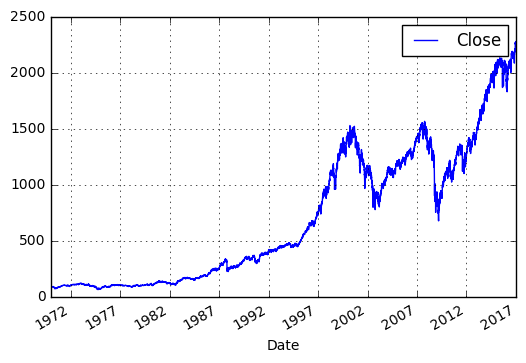

In [20]:
stock_df.plot(kind='line', x='Date', y='Close')
plt.grid()

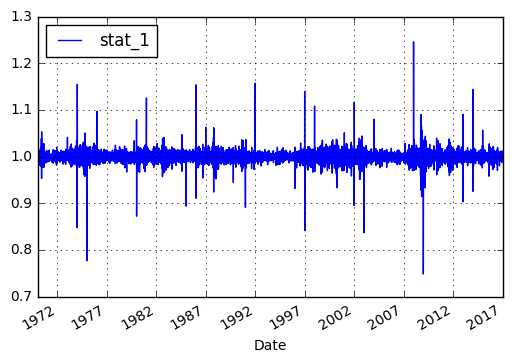

In [21]:
stock_df.plot(kind='line', x='Date', y='stat_1')
plt.grid()

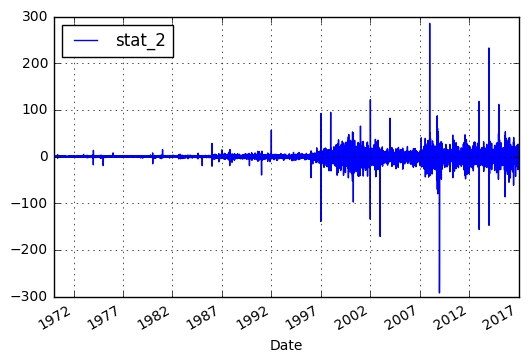

In [22]:
stock_df.plot(kind='line', x='Date', y='stat_2')
plt.grid()

** Observation ** Looks like the time series for stat_1 appears more stationary compared to stat_2

# Correlation analysis

In [23]:
num_groups = len(stock_df.groupby(by=['year', 'weekofyear']))

In [24]:
print(num_groups)

2454


In [25]:
# create a (num_groups x 5) numpy array to hold the daily stock value (per row) for all groups (all rows)
daily_stats_by_week = np.empty((num_groups, 5))
daily_stats_by_week[:] = np.nan

In [26]:
daily_stats_by_week

array([[ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

In [27]:
ctr = 0
for grp, grped_df in stock_df.groupby(by=['year', 'weekofyear']):
    #print(ctr)
    #print(grp)
    vals = (grped_df[['weekday', 'stat_1']].values)
    #print(vals)
    daily_stats_by_week[ctr, vals[:, 0].astype(int)] = vals[:, 1]
    #print(daily_stats_by_week[ctr, :])
    ctr += 1

In [28]:
daily_stats_by_week[0:10,:]

array([[        nan,         nan,         nan,         nan,  1.        ],
       [ 1.00713377,  1.00023708,  0.99818959,  0.99872843,  0.99571114],
       [ 1.00137591,  1.00377835,  1.00082996,  1.00115754,  0.99285822],
       [ 0.99868551,  1.00069068,  1.0020274 ,  1.00303003,  0.99556637],
       [ 1.01744787,  1.01110114,  1.00152324,  0.98882967,  0.98109807],
       [ 0.99480267,  1.00663585,  1.00048723,  0.99654287,  1.00153138],
       [ 1.00399244,  0.99349207,  1.00318472,  1.00076158,  0.99856918],
       [ 0.99146926,  0.99032267,  1.00259133,  1.00626047,  1.00935627],
       [        nan,  0.98937425,  1.00466631,  0.99960648,  1.00635296],
       [ 0.99806415,  1.00384943,  1.00173557,  1.00129054,  0.99506031]])

** daily_stats_by_week contains stat_1 values organized weekly (each week is a row) **

In [29]:
daily_stats_by_week_df = pd.DataFrame(data=daily_stats_by_week, columns=['Mon', 'Tue', 'Wed', 'Thur', 'Fri'])

In [30]:
daily_stats_by_week_df.head()

,Mon,Tue,Wed,Thur,Fri
0,NaN,NaN,NaN,NaN,1.000000
1,1.007134,1.000237,0.998190,0.998728,0.995711
2,1.001376,1.003778,1.000830,1.001158,0.992858
3,0.998686,1.000691,1.002027,1.003030,0.995566
4,1.017448,1.011101,1.001523,0.988830,0.981098


** Check if stats are consistent with groupby method **

In [31]:
daily_stats_by_week_df.mean()

Mon     0.999301
Tue     0.999727
Wed     1.000349
Thur    1.000169
Fri     1.000407
dtype: float64

In [32]:
daily_stats_by_week_df.std()

Mon     0.016448
Tue     0.012884
Wed     0.010519
Thur    0.012426
Fri     0.014503
dtype: float64

In [33]:
# fill with mean
daily_stats_by_week_df = daily_stats_by_week_df.fillna(daily_stats_by_week_df.mean())

In [34]:
daily_stats_by_week_df.corr()

,Mon,Tue,Wed,Thur,Fri
Mon,1.000000,0.643937,-0.500126,-0.816441,-0.775122
Tue,0.643937,1.000000,-0.351295,-0.810915,-0.789955
Wed,-0.500126,-0.351295,1.000000,0.290766,0.096439
Thur,-0.816441,-0.810915,0.290766,1.000000,0.743258
Fri,-0.775122,-0.789955,0.096439,0.743258,1.000000


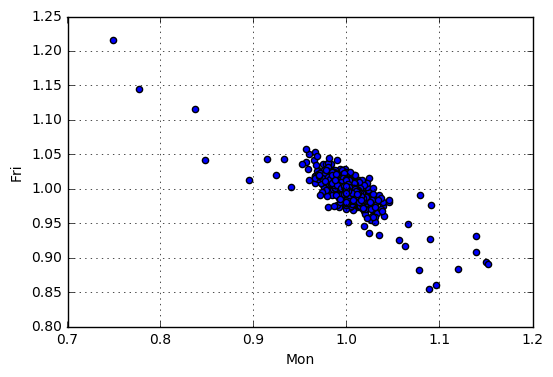

In [35]:
daily_stats_by_week_df.plot(kind='scatter', x='Mon', y='Fri')
plt.grid()

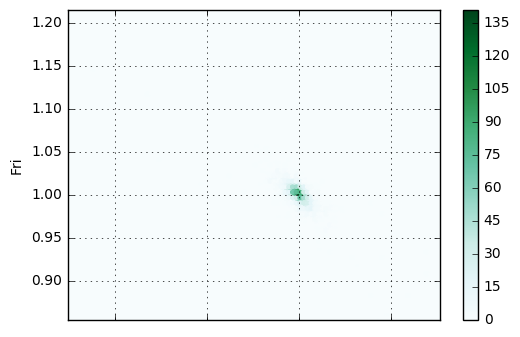

In [36]:
daily_stats_by_week_df.plot(kind='hexbin', x='Mon', y='Fri')
plt.grid()

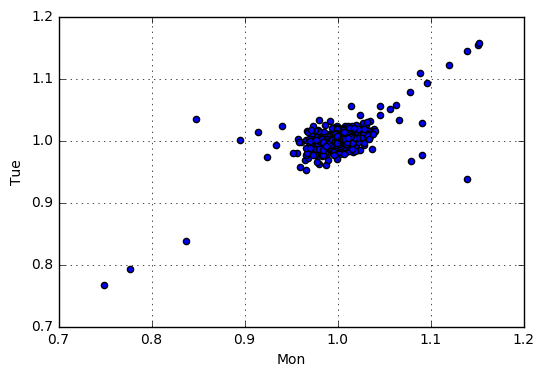

In [37]:
daily_stats_by_week_df.plot(kind='scatter', x='Mon', y='Tue')
plt.grid()

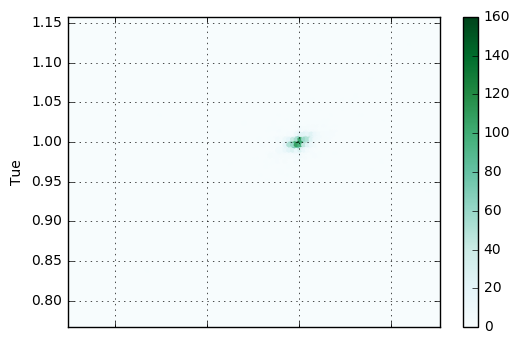

In [38]:
daily_stats_by_week_df.plot(kind='hexbin', x='Mon', y='Tue')
plt.grid()

** Observation: ** Negative correlation between the start and end of the week